# Huber Loss

Huber Loss 是一个用于回归问题的带参损失函数, 优点是能增强平方误差损失函数(MSE, mean square error)对离群点的鲁棒性。

当预测偏差小于 δ 时，它采用平方误差;

当预测偏差大于 δ 时，采用的线性误差。

相比于最小二乘的线性回归，HuberLoss降低了对离群点的惩罚程度，所以 HuberLoss 是一种常用的鲁棒的回归损失函数。

Huber Loss 定义如下

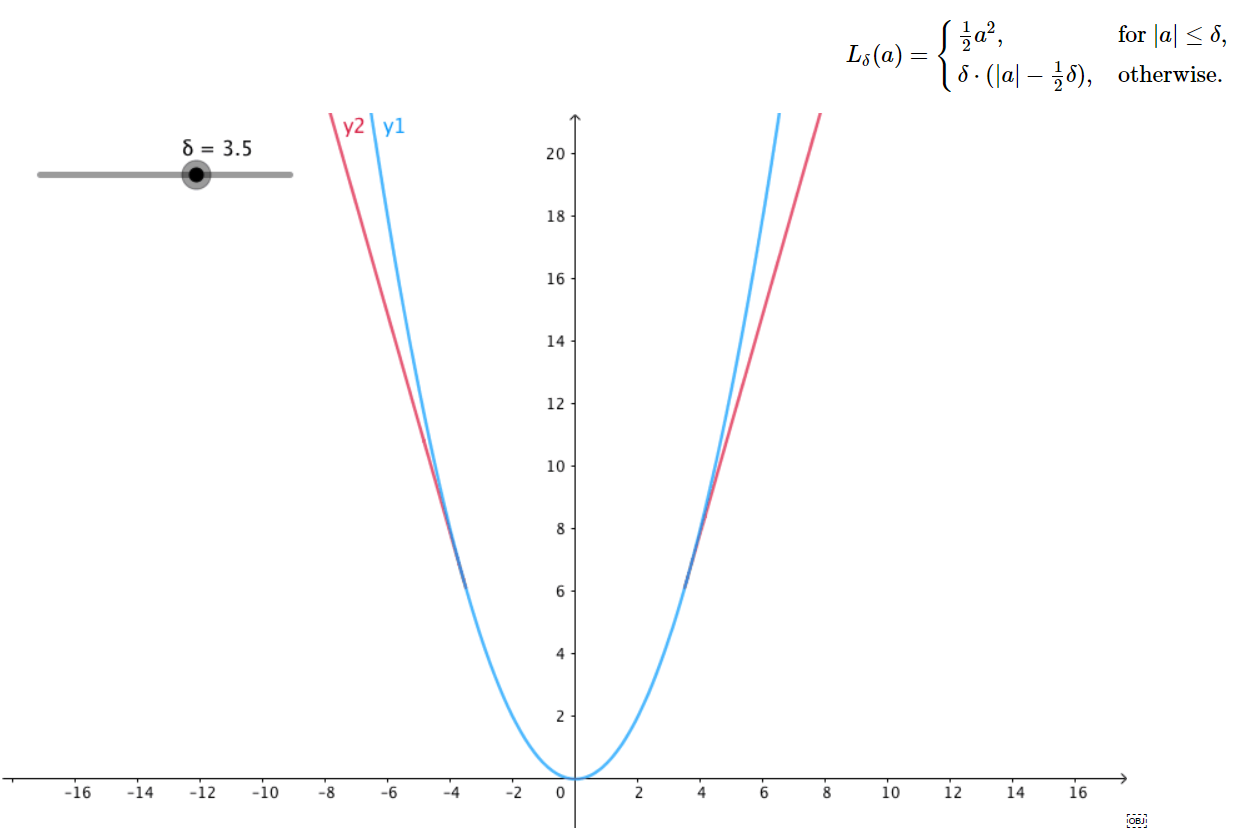

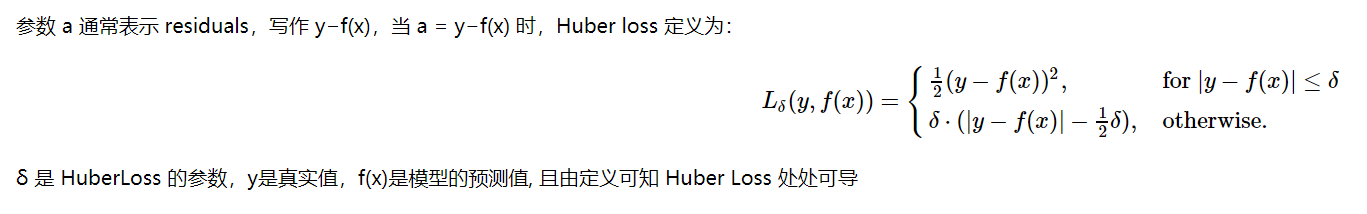

In [1]:
import tensorflow as tf

y_true = tf.constant([[1],[4],[2],[1]],tf.float32)
y_pred = tf.constant([[4],[2],[1],[3]],tf.float32)
theta = tf.constant(2,tf.float32)

#### huber_loss
def huber_loss(y_pred,y_true,theta):
    judge_h = tf.cast(tf.greater(tf.abs(y_true-y_pred),theta),tf.float32)#tf.greater：比较两个列表元素的大小
    loss_h = judge_h*(theta*tf.abs(y_true-y_pred) - 0.5*tf.square(theta))
    
    judge_l = tf.cast(tf.less_equal(tf.abs(y_true-y_pred),theta),tf.float32)
    loss_l = judge_l*0.5*tf.square(y_true - y_pred)
    loss = 2*tf.reduce_sum(tf.concat([loss_h,loss_l],axis=0))
    return loss
huber = huber_loss(y_pred, y_true, theta)

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

huber_loss = sess.run([huber])
print("huber loss：",huber_loss)

huber loss： [17.0]
